   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

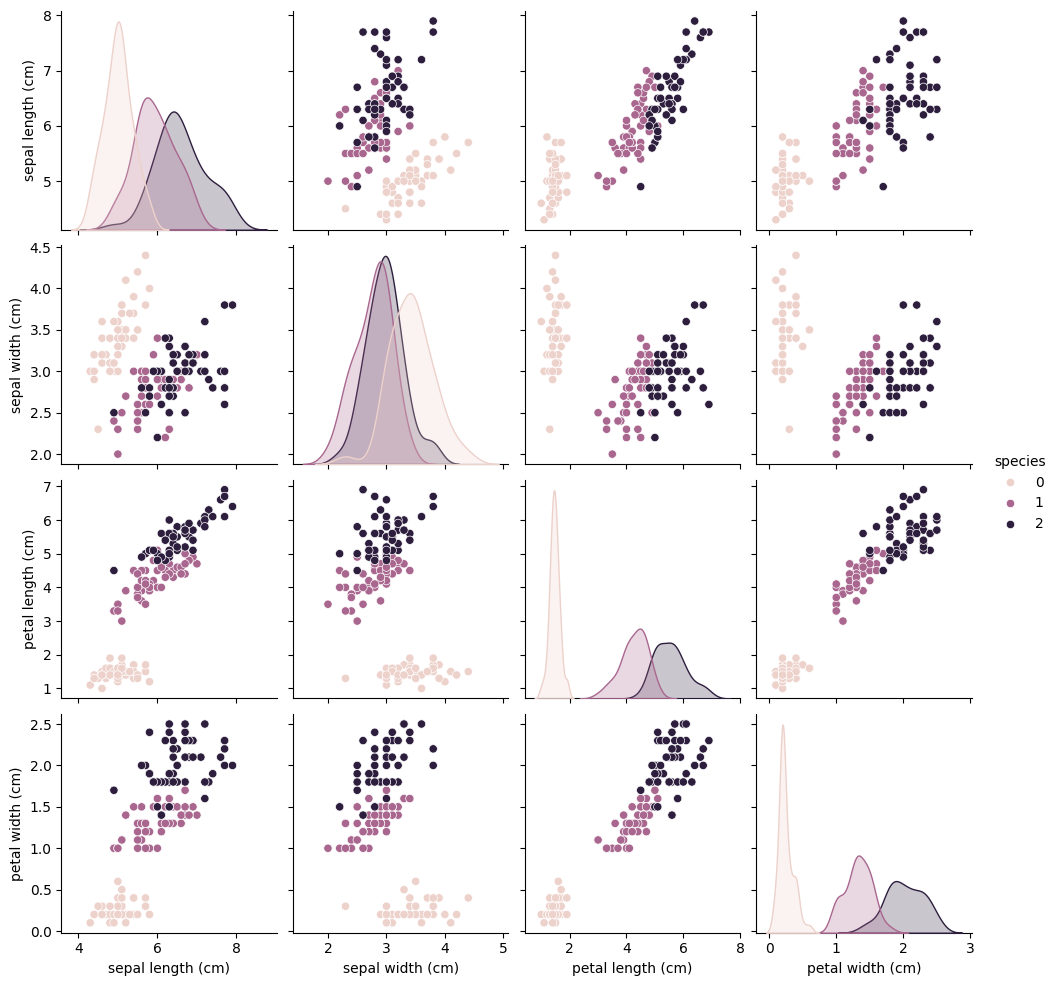

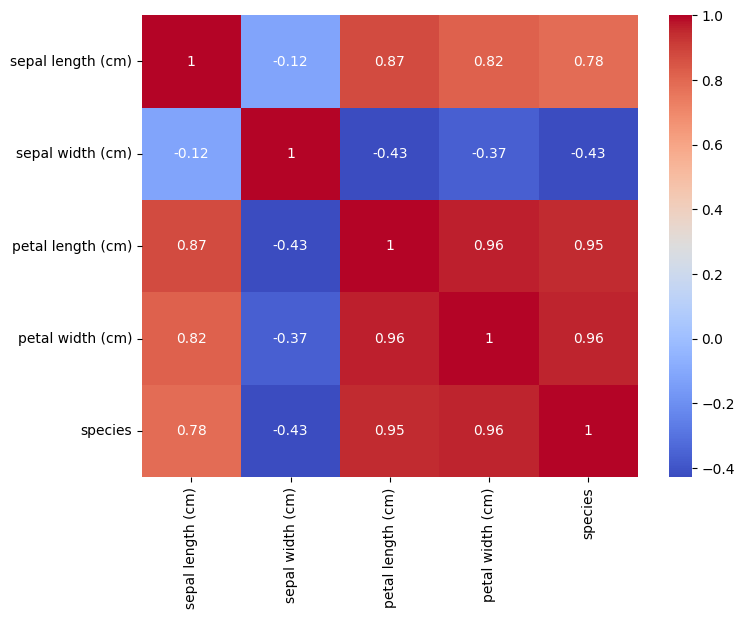

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Initial EDA
print(iris_df.head())
print(iris_df.describe())
sns.pairplot(iris_df, hue='species')
plt.show()

# Feature correlations
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.show()


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

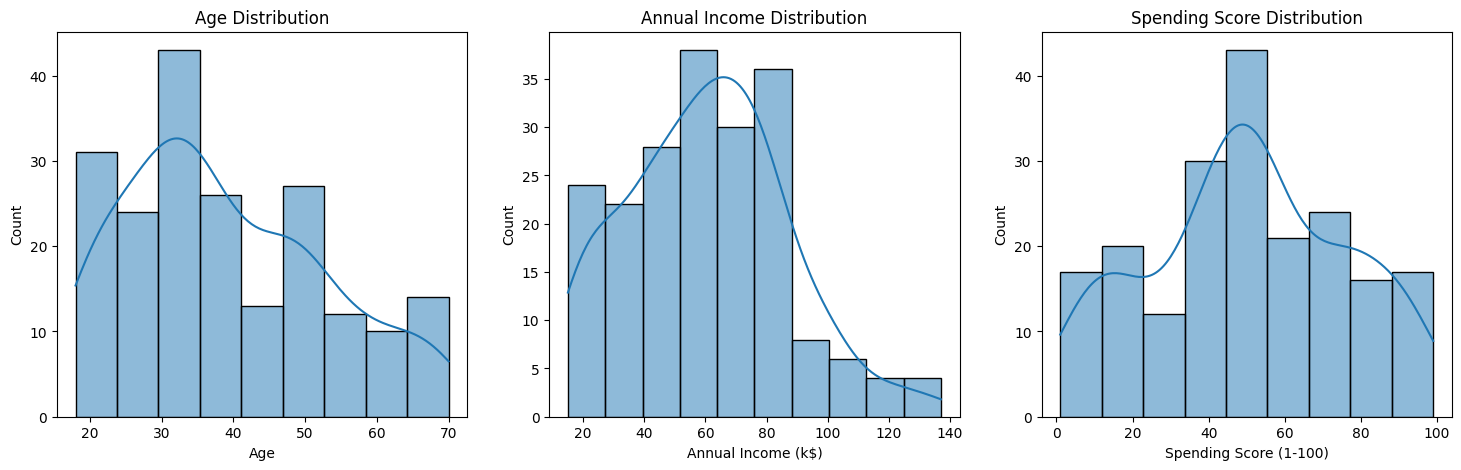

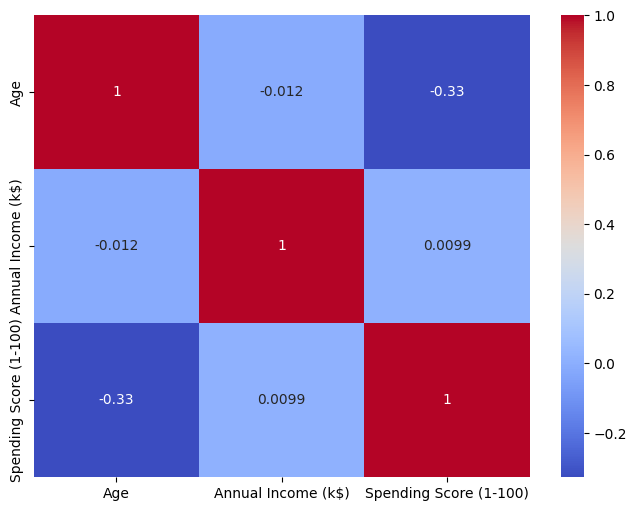

In [2]:
# Load Mall Customers dataset
mall_df = pd.read_csv('/content/Mall_Customers (1).csv')
# Initial EDA
print(mall_df.head())
print(mall_df.describe())

# Plot distributions
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(mall_df['Age'], kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')

sns.histplot(mall_df['Annual Income (k$)'], kde=True, ax=axs[1])
axs[1].set_title('Annual Income Distribution')

sns.histplot(mall_df['Spending Score (1-100)'], kde=True, ax=axs[2])
axs[2].set_title('Spending Score Distribution')

plt.show()

# Feature correlations
plt.figure(figsize=(8, 6))
sns.heatmap(mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.show()


Implementing Clustering algorithms

K- means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

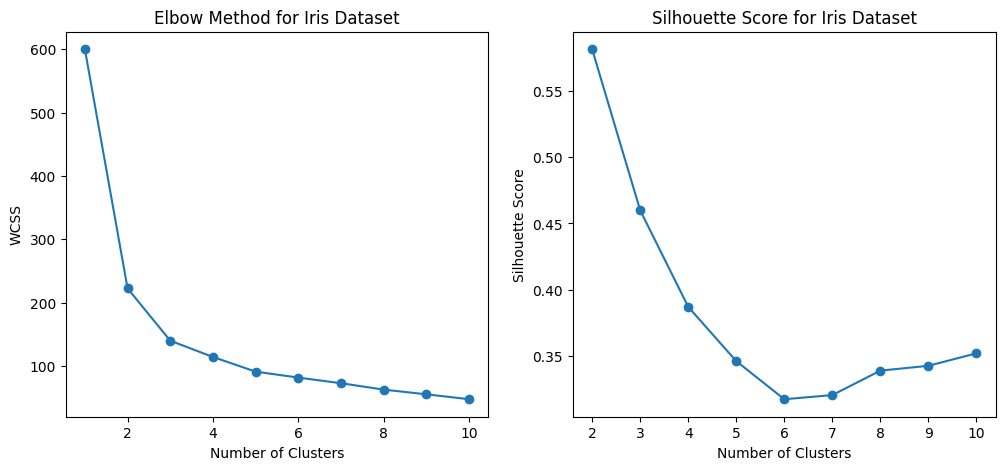

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

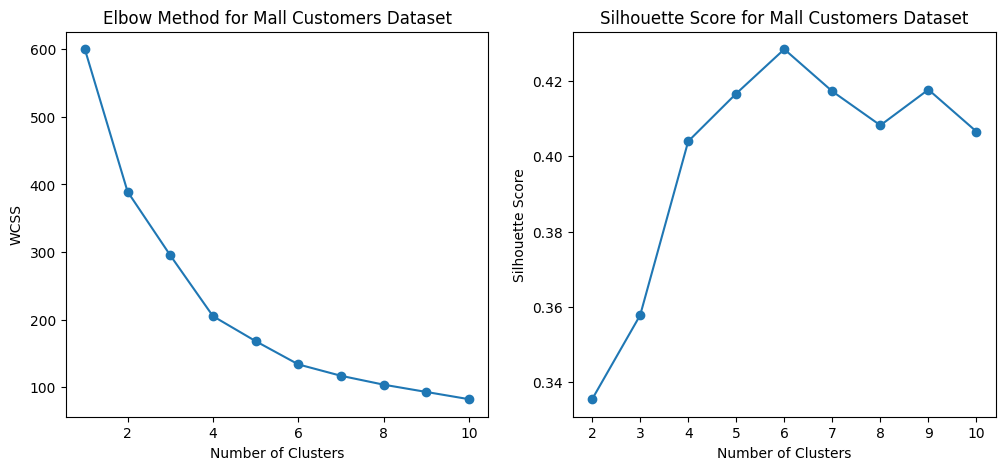

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Standardize features for both datasets
scaler_iris = StandardScaler()
scaler_mall = StandardScaler()

iris_scaled = scaler_iris.fit_transform(iris_df.drop('species', axis=1))
mall_scaled = scaler_mall.fit_transform(mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# K-Means for Iris Dataset
wcss_iris = []
silhouette_scores_iris = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    wcss_iris.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores_iris.append(silhouette_score(iris_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss_iris, marker='o')
plt.title('Elbow Method for Iris Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_iris, marker='o')
plt.title('Silhouette Score for Iris Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

# K-Means for Mall Customers Dataset
wcss_mall = []
silhouette_scores_mall = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mall_scaled)
    wcss_mall.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores_mall.append(silhouette_score(mall_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss_mall, marker='o')
plt.title('Elbow Method for Mall Customers Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_mall, marker='o')
plt.title('Silhouette Score for Mall Customers Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()


Hierarchical Clustering

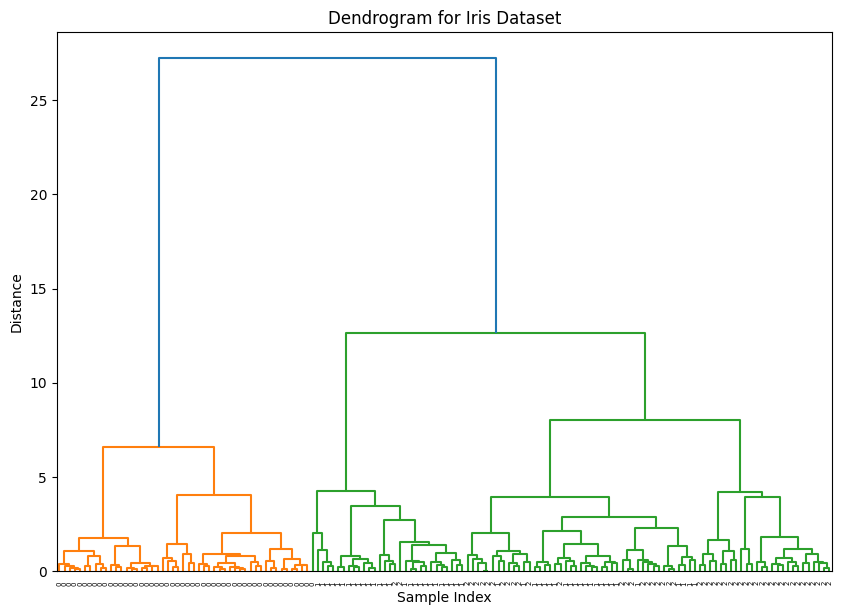

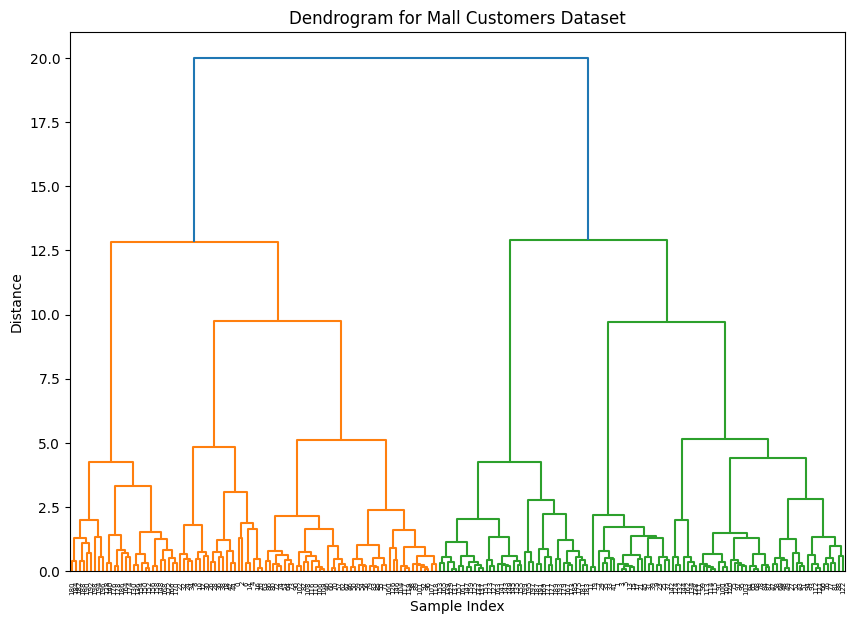

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical Clustering for Iris Dataset
linked_iris = linkage(iris_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked_iris, orientation='top', labels=iris_df['species'].values)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Hierarchical Clustering for Mall Customers Dataset
linked_mall = linkage(mall_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked_mall, orientation='top')
plt.title('Dendrogram for Mall Customers Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Clustering and Visualizaion

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


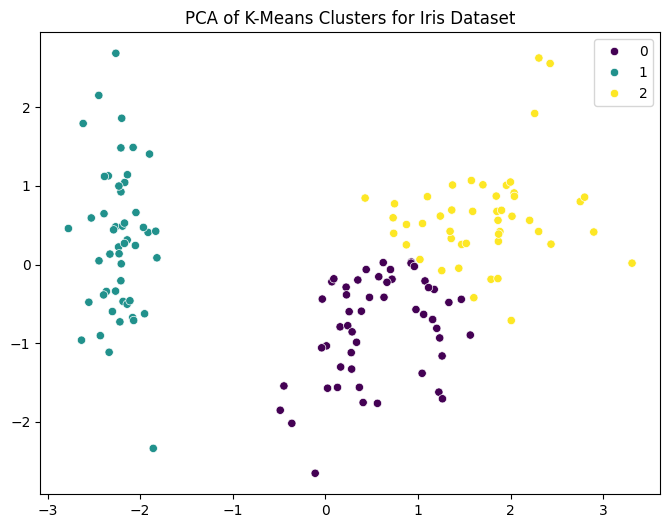

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


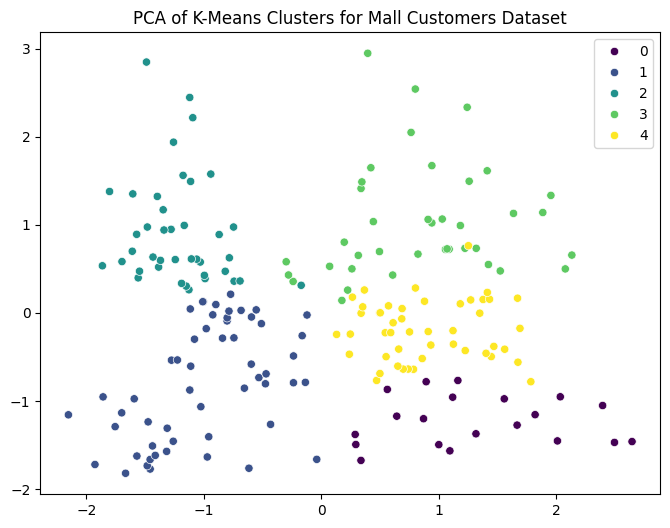

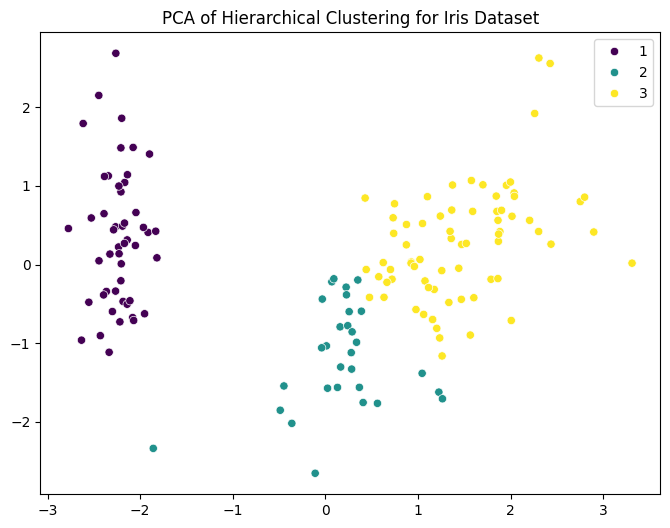

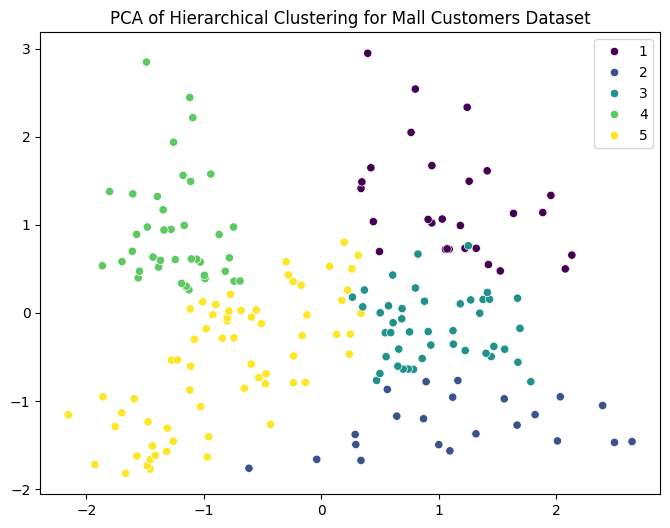

In [5]:
from sklearn.decomposition import PCA

# Visualize K-Means Clusters for Iris Dataset
kmeans_iris = KMeans(n_clusters=3, random_state=42)
iris_clusters = kmeans_iris.fit_predict(iris_scaled)
pca_iris = PCA(n_components=2)
iris_pca = pca_iris.fit_transform(iris_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=iris_clusters, palette='viridis')
plt.title('PCA of K-Means Clusters for Iris Dataset')
plt.show()

# Visualize K-Means Clusters for Mall Customers Dataset
kmeans_mall = KMeans(n_clusters=5, random_state=42)
mall_clusters = kmeans_mall.fit_predict(mall_scaled)
pca_mall = PCA(n_components=2)
mall_pca = pca_mall.fit_transform(mall_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=mall_pca[:, 0], y=mall_pca[:, 1], hue=mall_clusters, palette='viridis')
plt.title('PCA of K-Means Clusters for Mall Customers Dataset')
plt.show()

# Hierarchical Clustering Visualization
# Iris Dataset
iris_clusters_hc = fcluster(linked_iris, t=3, criterion='maxclust')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=iris_clusters_hc, palette='viridis')
plt.title('PCA of Hierarchical Clustering for Iris Dataset')
plt.show()

# Mall Customers Dataset
mall_clusters_hc = fcluster(linked_mall, t=5, criterion='maxclust')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mall_pca[:, 0], y=mall_pca[:, 1], hue=mall_clusters_hc, palette='viridis')
plt.title('PCA of Hierarchical Clustering for Mall Customers Dataset')
plt.show()


Expolatory Ana;ysis and Insights

In [7]:
# Mall Customers Dataset
mall_df['kmeans_cluster'] = mall_clusters
mall_df['hc_cluster'] = mall_clusters_hc

print("Mall Customers Dataset K-Means Cluster Analysis:")
# Select only numeric columns for mean calculation
print(mall_df.groupby('kmeans_cluster').mean(numeric_only=True))

print("Mall Customers Dataset Hierarchical Cluster Analysis:")
# Select only numeric columns for mean calculation
print(mall_df.groupby('hc_cluster').mean(numeric_only=True))



Mall Customers Dataset K-Means Cluster Analysis:
                CustomerID        Age  Annual Income (k$)  \
kmeans_cluster                                              
0                24.100000  46.250000           26.750000   
1                55.648148  25.185185           41.092593   
2               161.025000  32.875000           86.100000   
3               159.743590  39.871795           86.102564   
4                83.872340  55.638298           54.382979   

                Spending Score (1-100)  hc_cluster  
kmeans_cluster                                      
0                            18.350000    2.000000  
1                            62.240741    4.888889  
2                            81.525000    4.025000  
3                            19.358974    2.025641  
4                            48.851064    3.170213  
Mall Customers Dataset Hierarchical Cluster Analysis:
            CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
hc_cluster       